In [38]:
import calour as ca
import calour_utils as cu

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import shutil

In [40]:
ca.set_log_level('INFO')

In [41]:
%matplotlib notebook

In [42]:
pwd

'/Users/amnon/Projects/sheba/metaanalysis/scripts'

In [43]:
pd.__version__

'1.0.5'

# Load the data

In [33]:
dd=ca.read_amplicon('../ratios/nonspecific/nonspecific.biom','../ratios/nonspecific/nonspecific_sample.txt',
                    feature_metadata_file='../ratios/nonspecific/nonspecific_feature.txt',normalize=None, min_reads=None)

2021-04-04 17:59:54 INFO loaded 28 samples, 128 features


# Plot the taxonomy count

In [34]:
from collections import defaultdict
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_tax_count(exp,level=2):
    counts = [defaultdict(int),defaultdict(int)]
    totbact = [0,0]
    totbact=[np.sum(exp.feature_metadata['esize']<0),np.sum(exp.feature_metadata['esize']>0)]
    for idx,cbact in exp.feature_metadata.iterrows():
        if cbact['esize']<0:
            cgroup = 0
        else:
            cgroup = 1
        ctax = cbact['Taxon'].split(';')
        if len(ctax)<level+1:
            ctax = 'na'
        else:
            ctax = ctax[level]
        counts[cgroup][ctax] += 1/totbact[cgroup]
        alltax = set()
        for ctax in counts[0].keys():
            alltax.add(ctax)
        for ctax in counts[1].keys():
            alltax.add(ctax)
        alltax=sorted(alltax)

    f=plt.figure()
    bot=np.array([0.0,0.0])
    for ctax in alltax:
        cdat = np.array([counts[0][ctax],counts[1][ctax]])
        plt.bar([0,1],cdat,bottom=bot)
        bot += cdat
    alltax = [x.strip('_') for x in alltax]
    print('control:')
    for ck,cv in counts[0].items():
        print('%s: %f (%d)' % (ck, cv, cv*totbact[0]))
    print('disease:')
    for ck,cv in counts[1].items():
        print('%s: %f (%d)' % (ck, cv, cv*totbact[1]))
    plt.legend(alltax)
    plt.xlim([-0.5,4])
    plt.xticks([0,1],['control','disease'])
    plt.ylabel('fraction of bacteria')
    return f

<IPython.core.display.Javascript object>


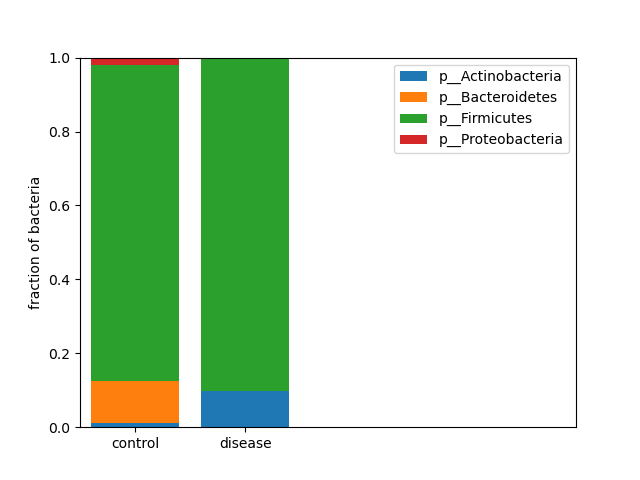

control:
_p__Firmicutes: 0.855670 (82)
_p__Bacteroidetes: 0.113402 (11)
_p__Proteobacteria: 0.020619 (2)
_p__Actinobacteria: 0.010309 (1)
disease:
_p__Firmicutes: 0.903226 (27)
_p__Actinobacteria: 0.096774 (3)
_p__Bacteroidetes: 0.000000 (0)
_p__Proteobacteria: 0.000000 (0)


In [35]:
f=plot_tax_count(dd,1)
f.savefig('../figures/fig3/taxonomy-nonspecific-phylum.pdf')

<IPython.core.display.Javascript object>


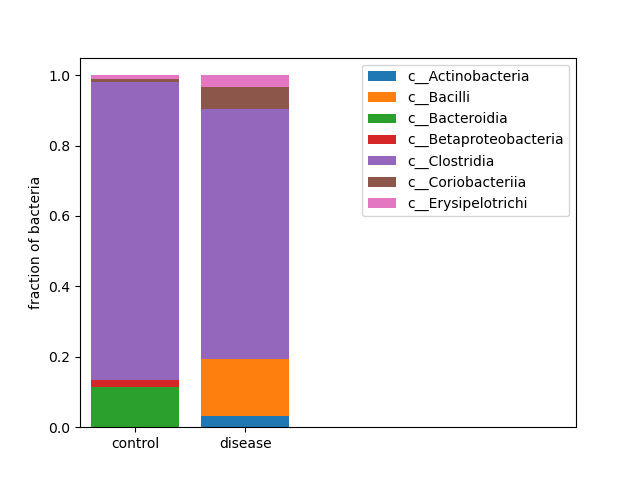

control:
_c__Erysipelotrichi: 0.010309 (1)
_c__Clostridia: 0.845361 (81)
_c__Bacteroidia: 0.113402 (11)
_c__Betaproteobacteria: 0.020619 (2)
_c__Coriobacteriia: 0.010309 (1)
_c__Actinobacteria: 0.000000 (0)
_c__Bacilli: 0.000000 (0)
disease:
_c__Bacilli: 0.161290 (5)
_c__Clostridia: 0.709677 (21)
_c__Coriobacteriia: 0.064516 (2)
_c__Actinobacteria: 0.032258 (1)
_c__Erysipelotrichi: 0.032258 (1)
_c__Bacteroidia: 0.000000 (0)
_c__Betaproteobacteria: 0.000000 (0)


In [36]:
f=plot_tax_count(dd,2)
f.savefig('../figures/fig3/taxonomy-nonspecific-class.pdf')

<IPython.core.display.Javascript object>


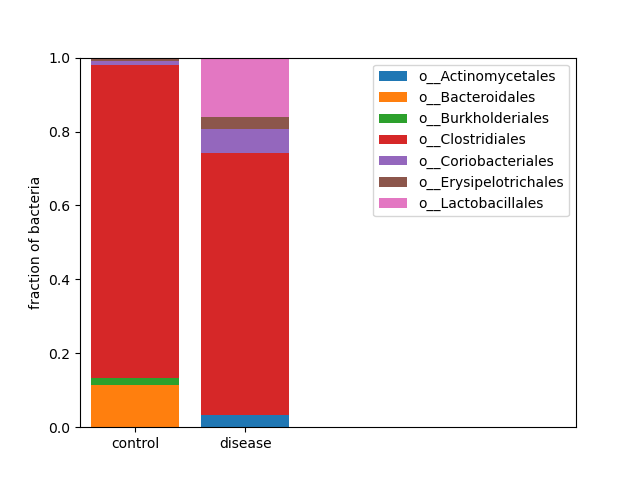

control:
_o__Erysipelotrichales: 0.010309 (1)
_o__Clostridiales: 0.845361 (81)
_o__Bacteroidales: 0.113402 (11)
_o__Burkholderiales: 0.020619 (2)
_o__Coriobacteriales: 0.010309 (1)
_o__Actinomycetales: 0.000000 (0)
_o__Lactobacillales: 0.000000 (0)
disease:
_o__Lactobacillales: 0.161290 (5)
_o__Clostridiales: 0.709677 (21)
_o__Coriobacteriales: 0.064516 (2)
_o__Actinomycetales: 0.032258 (1)
_o__Erysipelotrichales: 0.032258 (1)
_o__Bacteroidales: 0.000000 (0)
_o__Burkholderiales: 0.000000 (0)


In [37]:
f=plot_tax_count(dd,3)
f.savefig('../figures/fig3/taxonomy-nonspecific-order.pdf')